## Notebook exploring running least squares regression and its Ridge and Lasso variations on housing data from Boston.

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [142]:
from sklearn.datasets import load_boston

In [143]:
##First basic least squares regression

In [144]:
df = load_boston()

In [145]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [146]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [147]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [148]:
#Define features and target
target = np.array(df.feature_names) == 'DIS'
X = df.data[:,np.logical_not(target)]  #the np function applies NOT to the whole dataset, so "take all columns that are NOT target"
y = df.data[:, target].squeeze()  #MEDV is the target (see description)

In [149]:
#Split data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

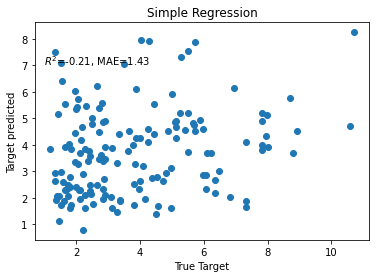

In [150]:
## Instantiate model and fit it to training data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

plt.scatter(y_test, predictions)
plt.ylabel('Target predicted')
plt.xlabel('True Target')
plt.title('Simple Regression')
plt.text(1, 7, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))

fig.show()

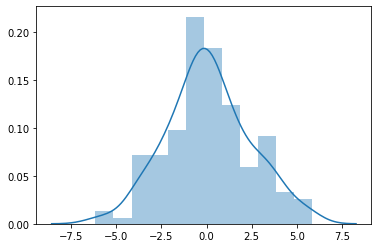

In [151]:
#Check distribution of error between y_test and the predictions
sns.distplot((y_test-predictions))

In [152]:
#For some reason only getting 12 coefficients instead of 13.  Truncating the last feature for now.
coef_df = pd.DataFrame(lm.coef_, df.feature_names[:12], columns=['Coeff'])
coef_df
#How to interpret: If holding all other features constant, a 1 unit increase in crime, results in a -0.0216 decrease in price of the house.

,Coeff
CRIM,-0.015003
ZN,0.030100
INDUS,-0.049672
CHAS,-0.161895
NOX,-5.696979
RM,-0.348102
AGE,-0.017979
DIS,0.004989
RAD,-0.000289
TAX,0.064853


In [153]:
## Run predictions on test sets and analyze error through plots and RMSE.

In [154]:
predictions = lm.predict(X_test)

### Ridge and Lasso Regressions

*   Forms of least square regression that have a  regulized term to balance training vs. test error (eg. to penalize model complexity).  Ridge is the squared version of Lasso. 
*  Lasso has added benefit of producing sparse solutions.



 

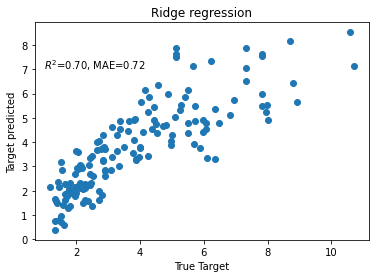

In [155]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.compose import TransformedTargetRegressor

#RidgeCV has built-in cross-validation to figure out the best alpha/regulizer value.  
#Just have to provide the alphas for it to run.  Default is (0.1,1,10).  Crazy simple.
regr = RidgeCV(alphas=(0.001,0.01,0.1,1,10,100,1000))  
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

plt.scatter(y_test, y_pred)

plt.ylabel('Target predicted')
plt.xlabel('True Target')
plt.title('Ridge regression')
plt.text(1, 7, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))

fig.show()

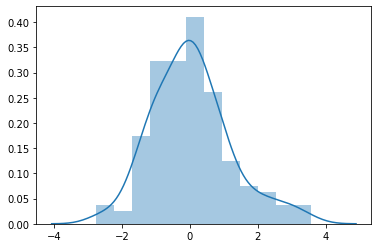

In [156]:
sns.distplot((y_test-y_pred))

In [157]:
#For some reason only getting 12 coefficients instead of 13.  Truncating the last feature for now.
coef_df = pd.DataFrame(regr.coef_, df.feature_names[:12], columns=['Coeff'])
coef_df

,Coeff
CRIM,-0.015005
ZN,0.030400
INDUS,-0.052522
CHAS,-0.165126
NOX,-5.185429
RM,-0.342277
AGE,-0.018664
DIS,0.003429
RAD,-0.000328
TAX,0.071706


###Lasso Regression

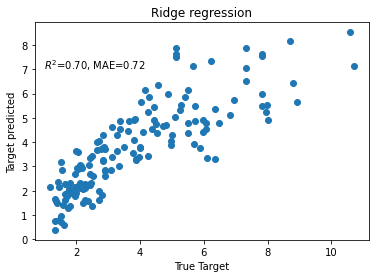

In [158]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.compose import TransformedTargetRegressor

#LassoCV has built-in cross-validation to figure out the best alpha/regulizer value.  
#Just have to provide the alphas for it to run.  Default is (0.1,1,10).  Crazy simple.
regr_l = LassoCV(alphas=(0.001,0.01,0.1,1,10,100,1000))  
regr_l.fit(X_train, y_train)
y_pred = regr.predict(X_test)

plt.scatter(y_test, y_pred)

plt.ylabel('Target predicted')
plt.xlabel('True Target')
plt.title('Ridge regression')
plt.text(1, 7, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))

fig.show()

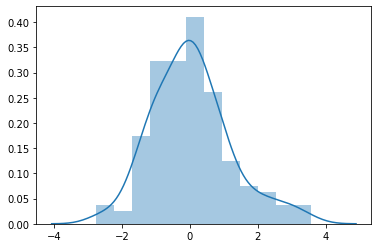

In [159]:
sns.distplot((y_test-y_pred))

In [160]:
#For some reason only getting 12 coefficients instead of 13.  Truncating the last feature for now.
coef_df = pd.DataFrame(regr_l.coef_, df.feature_names[:12], columns=['Coeff'])
coef_df

,Coeff
CRIM,-0.014969
ZN,0.030282
INDUS,-0.051651
CHAS,-0.148629
NOX,-5.353066
RM,-0.340793
AGE,-0.018496
DIS,0.003675
RAD,-0.000302
TAX,0.069605
